<a href="https://colab.research.google.com/github/Omorusi/Support_Vector_Machines/blob/main/Copy_of_Support_Vector_Machines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('/content/spam.csv')
data = pd.read_csv(file_path, encoding="latin-1")

data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
#Remainging the columns name
data = data[['v1','v2']]
data.columns = ['Category','Message']

data.head()


,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# Encoding the Category columns to numerical value ham:o Spam:1
data['Category'] = data['Category'].map({'ham': 0, 'spam': 1})

print(data)


      Category                                            Message
0            0  Go until jurong point, crazy.. Available only ...
1            0                      Ok lar... Joking wif u oni...
2            1  Free entry in 2 a wkly comp to win FA Cup fina...
3            0  U dun say so early hor... U c already then say...
4            0  Nah I don't think he goes to usf, he lives aro...
...        ...                                                ...
5567         1  This is the 2nd time we have tried 2 contact u...
5568         0              Will Ì_ b going to esplanade fr home?
5569         0  Pity, * was in mood for that. So...any other s...
5570         0  The guy did some bitching but I acted like i'd...
5571         0                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [ ]:
# using this function taken from
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, edgecolors='black',
                   facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)


In [ ]:


# Perform PCA to reduce TF-IDF features to 2D
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_tfidf.toarray())
X_test_pca = pca.transform(X_test_tfidf.toarray())

# Train SVM on 2D PCA-transformed data
svm_2d = SVC(kernel='linear')
svm_2d.fit(X_train_pca, y_train)

# Create a mesh grid for decision boundary
x_min, x_max = X_test_pca[:, 0].min() - 1, X_test_pca[:, 0].max() + 1
y_min, y_max = X_test_pca[:, 1].min() - 1, X_test_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Predict on mesh grid
Z = svm_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary and data points
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
sns.scatterplot(x=X_test_pca[:, 0], y=X_test_pca[:, 1], hue=y_test, palette=['blue', 'red'], alpha=0.8)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("SVM Decision Boundary for Spam Classification (PCA Projection)")
plt.legend(title="Category", labels=["Ham (0)", "Spam (1)"])
plt.show()


ValueError: Input y contains NaN.

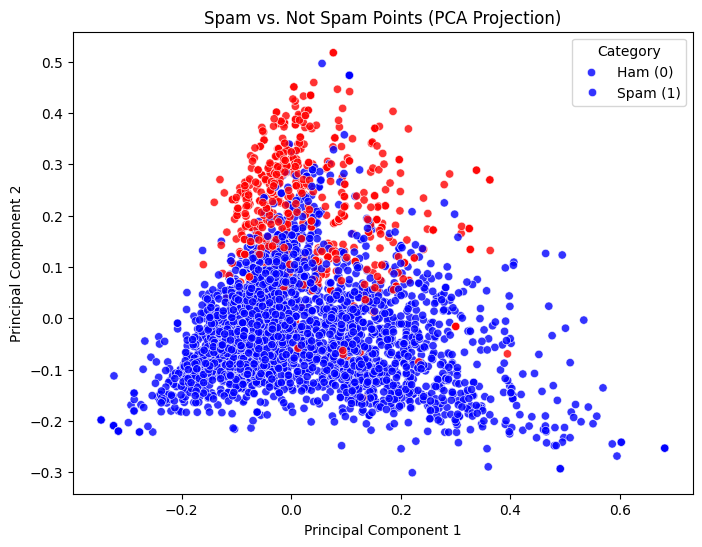

In [ ]:
# Plot only spam and not spam points
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y_train, palette=['blue', 'red'], alpha=0.8)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Spam vs. Not Spam Points (PCA Projection)")
plt.legend(title="Category", labels=["Ham (0)", "Spam (1)"])
plt.show()


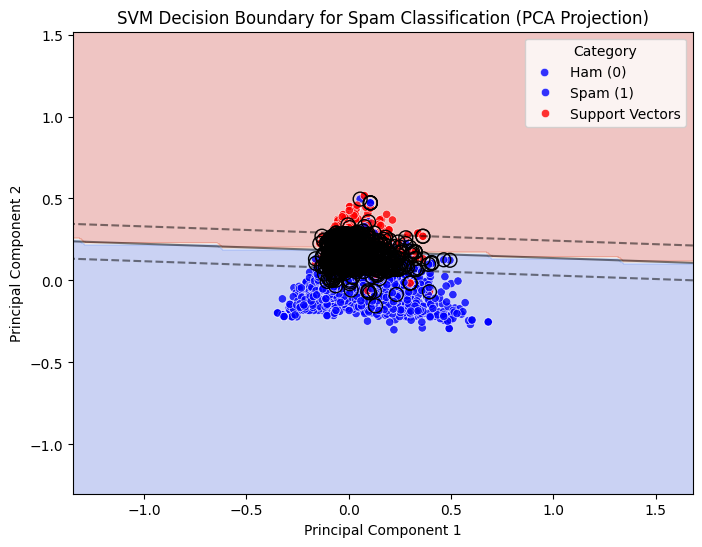

In [ ]:
# No need to rename columns; proceed with processing


# Extract features using TF-IDF
vectorizer = TfidfVectorizer(max_features=300)
X = vectorizer.fit_transform(data['Message']).toarray()
y = data['Category'].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform PCA to reduce TF-IDF features to 2D
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train SVM model on PCA-transformed data
svm_2d = SVC(kernel='linear')
svm_2d.fit(X_train_pca, y_train)

# Create figure and plot
fig, ax = plt.subplots(figsize=(8, 6))
plot_svc_decision_function(svm_2d, X_train_pca, y_train, ax=ax)
plt.show()


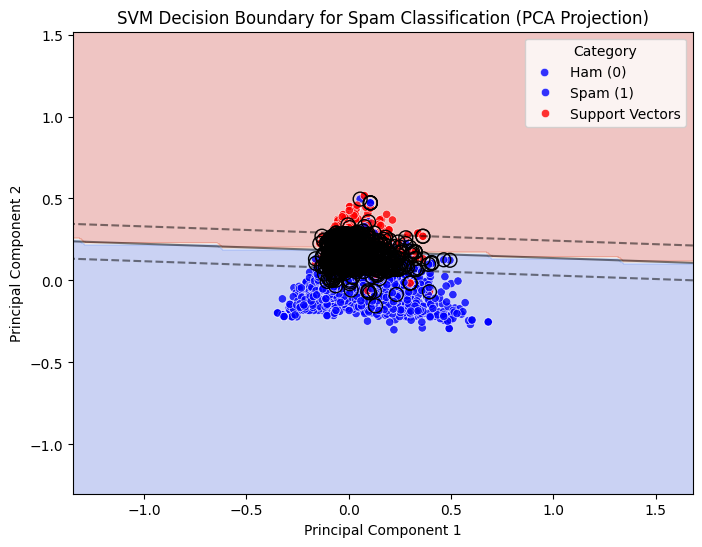

In [ ]:
# Redefine the function to plot decision boundary with support vectors
def plot_svc_decision_function(model, X, y, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVM."""
    if ax is None:
        ax = plt.gca()

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    # Predict on the grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    ax.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette=['blue', 'red'], alpha=0.8, ax=ax)

    # Get limits for plot
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # Plot decision boundary and margins
    ax.contour(X, Y, P, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

    # Plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
                   s=100, linewidth=1, edgecolors='black', facecolors='none', label="Support Vectors")

    ax.set_xlabel("Principal Component 1")
    ax.set_ylabel("Principal Component 2")
    ax.set_title("SVM Decision Boundary for Spam Classification (PCA Projection)")
    ax.legend(title="Category", labels=["Ham (0)", "Spam (1)", "Support Vectors"])

# Create figure and plot
fig, ax = plt.subplots(figsize=(8, 6))
plot_svc_decision_function(svm_2d, X_train_pca, y_train, ax=ax)
plt.show()
